In [30]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy.signal import find_peaks

In [5]:
df = pd.read_excel("dados_flx25_controle_machos_femeas.xlsx")

In [6]:
df.head()

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,sexo,dosagem,unidade
0,Immobility,0,119,143,5f8f5517d3d64947e0da2423,119,-7.569989,-1.98231,153.934,167.768,femea,veiculo,A7
1,Immobility,0,119,143,5f8f5517d3d64947e0da2423,120,-7.637543,-2.00000,144.632,168.136,femea,veiculo,A7
2,Immobility,0,119,143,5f8f5517d3d64947e0da2423,121,-3.818771,-1.00000,144.533,168.205,femea,veiculo,A7
3,Immobility,0,119,143,5f8f5517d3d64947e0da2423,122,-3.840844,-1.00578,103.306,178.569,femea,veiculo,A7
4,Immobility,0,119,143,5f8f5517d3d64947e0da2423,123,-22.890555,-5.99422,102.279,178.935,femea,veiculo,A7


In [7]:
df["dosagem"].unique()

array(['veiculo', 'flx2.5mg'], dtype=object)

In [8]:
df_femea_ve = df[(df["sexo"] == "femea") &(df['dosagem'] == "veiculo" )]
df_femea_flx = df[(df["sexo"] == "femea") &(df['dosagem'] == "flx2.5mg" )]
df_macho_ve = df[(df["sexo"] == "macho") &(df['dosagem'] == "veiculo" )]
df_macho_flx = df[(df["sexo"] == "macho") &(df['dosagem'] == "flx2.5mg" )]
df_femea_ve

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,sexo,dosagem,unidade
0,Immobility,0,119,143,5f8f5517d3d64947e0da2423,119,-7.569989,-1.98231,153.934,167.768,femea,veiculo,A7
1,Immobility,0,119,143,5f8f5517d3d64947e0da2423,120,-7.637543,-2.00000,144.632,168.136,femea,veiculo,A7
2,Immobility,0,119,143,5f8f5517d3d64947e0da2423,121,-3.818771,-1.00000,144.533,168.205,femea,veiculo,A7
3,Immobility,0,119,143,5f8f5517d3d64947e0da2423,122,-3.840844,-1.00578,103.306,178.569,femea,veiculo,A7
4,Immobility,0,119,143,5f8f5517d3d64947e0da2423,123,-22.890555,-5.99422,102.279,178.935,femea,veiculo,A7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209377,Immobility,157,7586,7592,5f8f5514d3d64947e0da23f3,7587,0.000000,0.00000,154.696,147.876,femea,veiculo,A1
209378,Immobility,157,7586,7592,5f8f5514d3d64947e0da23f3,7588,0.000000,0.00000,154.696,147.876,femea,veiculo,A1
209379,Immobility,157,7586,7592,5f8f5514d3d64947e0da23f3,7589,-19.827126,-5.29223,151.459,147.526,femea,veiculo,A1
209380,Immobility,157,7586,7592,5f8f5514d3d64947e0da23f3,7590,0.000000,0.00000,151.426,147.538,femea,veiculo,A1


In [36]:
print(len(df_macho_ve["unidade"].unique())+ len(df_macho_flx["unidade"].unique()))

12


In [9]:
df_femea_flx

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,sexo,dosagem,unidade
22164,Immobility,0,152,184,5f8f550fd3d64947e0da2393,152,0.139133,0.035490,179.979,116.433,femea,flx2.5mg,A3
22165,Immobility,0,152,184,5f8f550fd3d64947e0da2393,153,0.000000,0.000000,179.979,116.433,femea,flx2.5mg,A3
22166,Immobility,0,152,184,5f8f550fd3d64947e0da2393,154,0.000000,0.000000,179.979,116.433,femea,flx2.5mg,A3
22167,Immobility,0,152,184,5f8f550fd3d64947e0da2393,155,-4.642001,-1.184080,180.055,119.052,femea,flx2.5mg,A3
22168,Immobility,0,152,184,5f8f550fd3d64947e0da2393,156,-0.055445,-0.014143,180.070,119.001,femea,flx2.5mg,A3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194526,Undefined,104,7559,7586,5f8f550ed3d64947e0da238b,7581,0.000000,0.000000,209.500,92.500,femea,flx2.5mg,A2
194527,Undefined,104,7559,7586,5f8f550ed3d64947e0da238b,7582,0.000000,0.000000,209.500,92.500,femea,flx2.5mg,A2
194528,Undefined,104,7559,7586,5f8f550ed3d64947e0da238b,7583,0.000000,0.000000,209.500,92.500,femea,flx2.5mg,A2
194529,Undefined,104,7559,7586,5f8f550ed3d64947e0da238b,7584,0.000000,0.000000,209.500,92.500,femea,flx2.5mg,A2


In [10]:
df_femea_ve["categoria"].unique() 

array(['Immobility', 'Undefined', 'Swimming', 'Climbing', 'Diving',
       'Headshaking'], dtype=object)

In [11]:
def get_plot(df):
    df_femea_ve_vd = df["@Vd"].reset_index()
    x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
    x = x.reset_index()["@Vd"]
#     peaks, _ = find_peaks(abs(x)) #, height=50)
#     plt.plot(peaks, x[peaks], "x")
#     plt.show()
#     plt.hist(x[peaks],bins=60)
#     plt.show()
    plt.hist(x,bins=60)
    plt.show()

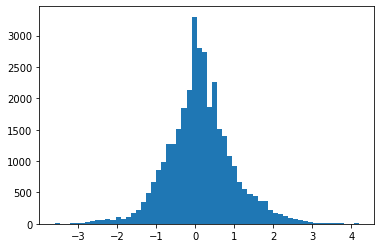

In [12]:
get_plot(df_femea_ve)

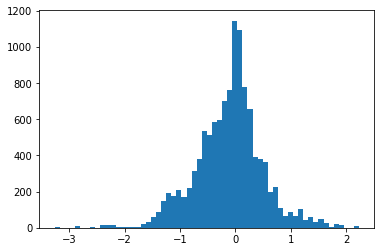

In [13]:
get_plot(df_femea_ve[df_femea_ve["categoria"] == "Immobility"])

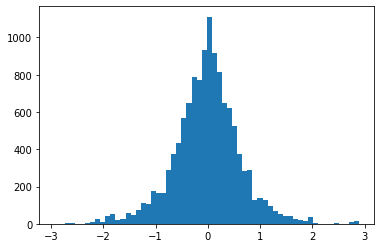

In [14]:
get_plot(df_femea_flx[df_femea_flx["categoria"] == "Immobility"])

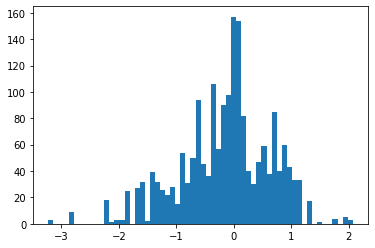

In [15]:
get_plot(df_femea_ve[df_femea_ve["categoria"] == "Swimming"])

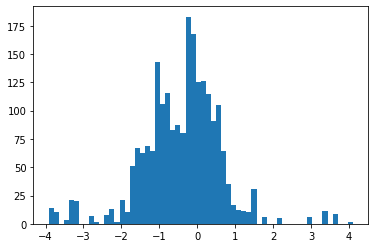

In [16]:
get_plot(df_femea_flx[df_femea_flx["categoria"] == "Swimming"])

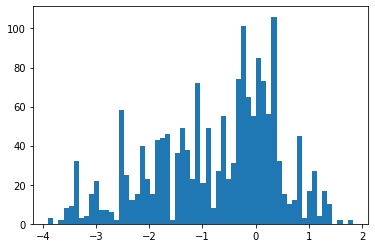

In [17]:
get_plot(df_macho_flx[df_macho_flx["categoria"] == "Swimming"])

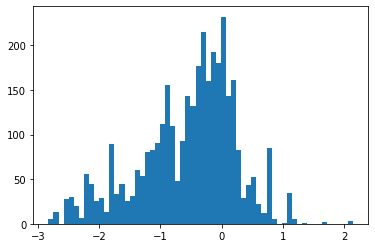

In [18]:
get_plot(df_macho_ve[df_macho_ve["categoria"] == "Swimming"])

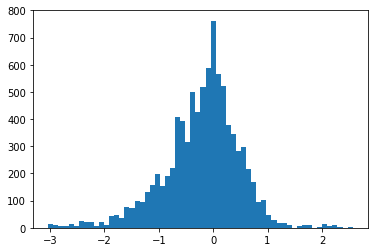

In [19]:
get_plot(df_macho_ve[df_macho_ve["categoria"] == "Immobility"])

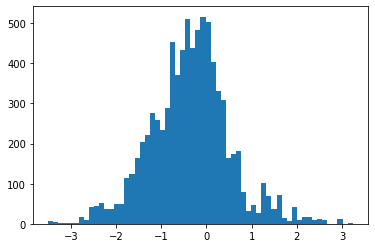

In [20]:
get_plot(df_macho_flx[df_macho_flx["categoria"] == "Immobility"])

In [21]:
df_femea_ve_vd = df_femea_ve["@Vd"].reset_index()
df_femea_ve_vd

,index,@Vd
0,0,-7.569989
1,1,-7.637543
2,2,-3.818771
3,3,-3.840844
4,4,-22.890555
...,...,...
66746,209377,0.000000
66747,209378,0.000000
66748,209379,-19.827126
66749,209380,0.000000


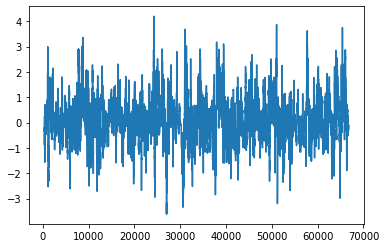

In [22]:
x = df_femea_ve_vd["@Vd"].rolling(100)
# plt.plot(x)
plt.plot(df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"])

In [23]:
x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
# ind = [i for i in range(len(x))]
x = x.reset_index()["@Vd"]

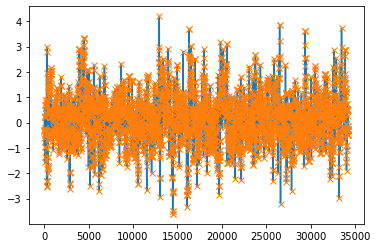

In [24]:
# x = df_femea_ve["@Vd"][0:1000].rolling(30).sum()
# x = df_femea_ve_vd[0:1000].rolling(30).sum().dropna()
plt.plot(x)

peaks, _ = find_peaks(abs(x)) #, height=50)
plt.plot(peaks, x[peaks], "x")

(array([  4.,   0.,   1.,   1.,   1.,   6.,   5.,   8.,   7.,   8.,  10.,
         13.,  22.,  19.,  22.,  36.,  48.,  73.,  91., 116., 158., 173.,
        168., 187., 212., 301., 255., 183., 242., 396., 258., 334., 265.,
        201., 186., 178., 135.,  92.,  87.,  78.,  60.,  57.,  48.,  33.,
         24.,  24.,  17.,  26.,   8.,  19.,   8.,   4.,   2.,   3.,   0.,
          3.,   3.,   2.,   0.,   1.]),
 array([-3.60572589, -3.47569651, -3.34566712, -3.21563773, -3.08560835,
        -2.95557896, -2.82554957, -2.69552019, -2.5654908 , -2.43546141,
        -2.30543203, -2.17540264, -2.04537325, -1.91534387, -1.78531448,
        -1.65528509, -1.52525571, -1.39522632, -1.26519693, -1.13516755,
        -1.00513816, -0.87510877, -0.74507939, -0.61505   , -0.48502061,
        -0.35499123, -0.22496184, -0.09493245,  0.03509693,  0.16512632,
         0.29515571,  0.42518509,  0.55521448,  0.68524387,  0.81527325,
         0.94530264,  1.07533203,  1.20536141,  1.3353908 ,  1.46542019,
      

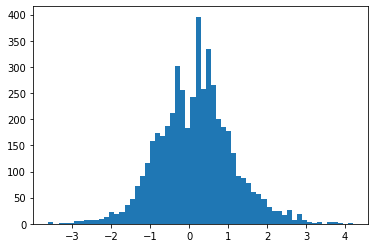

In [25]:
plt.hist(x[peaks],bins=60)

In [26]:
# x_n = abs(df_femea_ve["@Vd"][0:1000])
# x = df_femea_ve["@Vd"][0:1000]

In [27]:
# peaks, _ = find_peaks(x_n)
# peaks

In [28]:
# plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")

In [29]:
# plt.hist(x[peaks])